# Exponential Smoothing

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from Model_Evaluation import evaluate_model
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext_fs.csv')
books = books.dropna(axis = 1)
sales = books[['Year_Month','Sum of Sales']]
books.head()

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking","New Truck Lead Time (N.A. Backlog/Build Ratio, months)_indicators_m_trucking",B50001_indicators_m_trucking,GMFN_indicators_m_trucking,G325_indicators_m_trucking,G332_indicators_m_trucking,ISM_indicators_m_trucking,PORTEU_indicators_m_trucking,MANEMP_indicators_m_trucking,USTRADE_indicators_m_trucking,LEI_indicators_m_trucking,SPREAD_indicators_m_trucking,D/GAL_indicators_m_trucking,D/STOCK_indicators_m_trucking,Change in Payroll Employment (000's)_driver_indicators_m_trucking,Change in Truck Emp. (000's)_driver_indicators_m_trucking,LABORINDEX_driver_indicators_m_trucking,"Total Class 8, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer","Class 6-7 Bus, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Carloadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Class 8 Truck Utilization (%, SA)_freight_m_trucking_trailer",BUILD FOR_Total_Trailer,BUILD FOR_Flatbed,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports

In [4]:
data = pd.DataFrame(books[["Year_Month", "Sum of Sales"]]).set_index("Year_Month")
data.head()

,Sum of Sales
Year_Month,
2008-01,282604.11
2008-02,262474.40
2008-03,326059.68
2008-04,215387.49
2008-05,499559.90


In [5]:
from statsmodels.tsa.stattools import adfuller

def adfuller_Test(series):
  result = adfuller(series)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

X = data["Sum of Sales"]
adfuller_Test(series = X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -2.548909
p-value: 0.104023
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


In [6]:
data['sales_diffed'] = data['Sum of Sales'].diff(1)
adfuller_Test(series= data['sales_diffed'][1:])

ADF Statistic: -5.799806
p-value: 0.000000
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


In [7]:
train = data[:int(0.7*(len(data)))]
test = data[int(0.7*(len(data))):]
"""data.plot(figsize=(12,3))
data['z_data'] = (data['Sum of Sales'] - data["Sum of Sales"].rolling(window=12).mean()) / data["Sum of Sales"].rolling(window=12).std()
data['zp_data'] = data['z_data'] - data['z_data'].shift(12)"""

'data.plot(figsize=(12,3))\ndata[\'z_data\'] = (data[\'Sum of Sales\'] - data["Sum of Sales"].rolling(window=12).mean()) / data["Sum of Sales"].rolling(window=12).std()\ndata[\'zp_data\'] = data[\'z_data\'] - data[\'z_data\'].shift(12)'

In [8]:
train

,Sum of Sales,sales_diffed
Year_Month,,
2008-01,282604.11,NaN
2008-02,262474.40,-20129.71
2008-03,326059.68,63585.28
2008-04,215387.49,-110672.19
2008-05,499559.90,284172.41
...,...,...
2016-08,142433.39,-157244.85
2016-09,208317.43,65884.04
2016-10,279851.87,71534.44


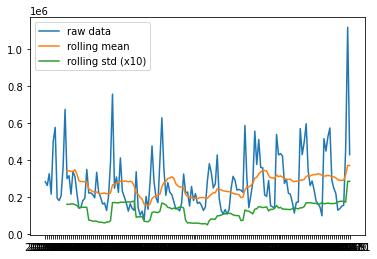

In [9]:
#fig, ax = plt.subplots(1,figsize=(12, 9))
plt.plot(data.index, data["Sum of Sales"], label='raw data')
plt.plot(data["Sum of Sales"].rolling(window=12).mean(), label="rolling mean");
plt.plot(data["Sum of Sales"].rolling(window=12).std(), label="rolling std (x10)");
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


			Model Performance

Mean Absolute Percentage Error0.42852113932652064

Mean Absolute Error 124228.72450061487

BIAS: 10170.818370673027

Mean Squared Error 4861940677.473337

Root Mean Squared Error 69727.61775274799
			Model Performance

Mean Absolute Percentage Error0.4285223185375687

Mean Absolute Error 124229.05125007287

BIAS: 10170.544890222325

Mean Squared Error 4861679218.10929

Root Mean Squared Error 69725.74286523802


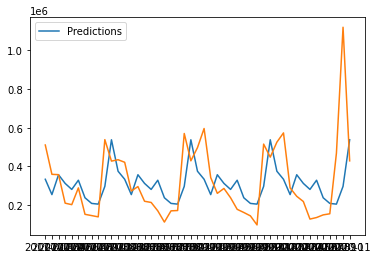

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing((train["Sum of Sales"]), trend="add", seasonal="mul", seasonal_periods=12)
model2 = ExponentialSmoothing(train["Sum of Sales"], trend="add", seasonal="mul", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(len(test))
fit2 = model2.fit()
pred2 = fit2.forecast(len(test))
evaluate_model(predictions= pred.values, actual= test["Sum of Sales"])
evaluate_model(predictions= pred2.values, actual= test["Sum of Sales"])
plt.plot(pred.values,label = "Predictions")
plt.plot(test["Sum of Sales"])
plt.legend()